<a href="https://colab.research.google.com/github/yukiharada1228/neural_network/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%81%AE%E3%83%80%E3%82%A6%E3%83%B3%E3%83%AD%E3%83%BC%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# google driveへ接続
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# APIキーの登録
# signateからsignate.jsonを入手し， /contentに配置してください
%mkdir ~/.signate
%cp ./signate.json ~/.signate/signate.json

In [3]:
# 必要なライブラリをインストール
%pip install signate

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=007b1278f9191624b415fee828ee03ce787d5bd45fcd10dd931c89f102322ba5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [4]:
# コンペティションidを検索
!signate list | grep テクノプロ

           1106  テクノプロ・デザイン社 食品パッケージ画像解析チャレンジ（一般部門・学生部門）     2023-09-29  総額 ¥520,000                                                                    1


In [5]:
# データをダウンロード
%mkdir /content/drive/MyDrive/Food-Package-Image-Analysis-Challenge
%mkdir /content/drive/MyDrive/Food-Package-Image-Analysis-Challenge/data
%cd /content/drive/MyDrive/Food-Package-Image-Analysis-Challenge/data
!signate download --competition-id=1106

/content/drive/MyDrive/Food-Package-Image-Analysis-Challenge/data
dataset_definition.md

train.csv

sample_submit.csv

test.zip

train.zip


Download completed.


In [6]:
# ダウンロードされたデータの確認
!ls

dataset_definition.md  sample_submit.csv  test.zip  train.csv  train.zip


In [ ]:
# zipファイルの解凍
!unzip train.zip
!unzip test.zip

In [8]:
# 解凍されたデータの確認
import pandas as pd
from glob import glob

train_csv = "train.csv"
sample_submit_csv = "sample_submit.csv"

train_len = len(list(glob("train/*")))
test_len = len(list(glob("test/*")))
train_csv_len = len(pd.read_csv(train_csv))
sample_submit_csv_len = len(pd.read_csv(sample_submit_csv, header=None))

print({"train_len": train_len, "test_len": test_len})
print({"train_csv_len": train_csv_len, "sample_submit_csv_len": sample_submit_csv_len})
if train_len != train_csv_len:
    print("訓練用データがまだ反映されていません．")
if test_len != sample_submit_csv_len:
    print("検証用データがまだ反映されていません．")

{'train_len': 2176, 'test_len': 2180}
{'train_csv_len': 2176, 'sample_submit_csv_len': 2180}


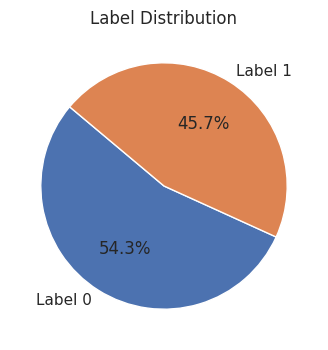

In [28]:
# csvデータの確認
train_df = pd.read_csv(train_csv)

plt.figure(figsize=(4, 4))
labels = ["Label 0", "Label 1"]
sizes = train_df['label'].value_counts(normalize=True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Label Distribution")
plt.show()

In [ ]:
# ラベル別で確認
drink_df = train_df[train_df["label"] == 0]
food_df = train_df[train_df["label"] == 1]

In [ ]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(image_names, title):
    num_images = len(image_names)
    num_cols = 2
    num_rows = num_images // num_cols + (num_images % num_cols > 0)

    plt.figure(figsize=(15, 5 * num_rows))

    for idx, image_name in enumerate(image_names):
        image_path = str(Path("train") / image_name)
        image = Image.open(image_path)
        pixels = image.histogram()

        plt.subplot(num_rows, num_cols * 2, idx * 2 + 1)
        plt.imshow(image)
        plt.title(f"Image: {image_name}")
        plt.axis('off')

        plt.subplot(num_rows, num_cols * 2, idx * 2 + 2)
        bin_count = 50  # ビンの数を調整
        plt.hist(pixels, bins=bin_count, range=(0, 256), color='blue', alpha=0.7)
        plt.title("Pixel Value Histogram")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 飲み物の画像ヒストグラムを表示
drink_image_names = drink_df["image_name"][:10]
plot_histograms(drink_image_names, "Drink Images")

# 食品の画像ヒストグラムを表示
food_image_names = food_df["image_name"][:10]
plot_histograms(food_image_names, "Food Images")